In [ ]:
#pip install pandas matplotlib seaborn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "https://raw.githubusercontent.com/NRSchaaf/weathering_the_rails/refs/heads/main/data/raw/RR_Accident_Weather_Data.csv"
railroad_df = pd.read_csv(path)

railroad_df

Mounted at /content/drive


,reportingrailroadcode,accidentnumber,date,time,accidenttype,hazmatreleasedcars,station,stateabbr,temperature,visibility_code,...,trainspeed,equipmentdamagecost,trackdamagecost,totaldamagecost,primaryaccidentcausecode,latitude,longitude,prior_temp,actual_temp,following_temp
0,CSX,000178042,8/7/2018,10:51 AM,Derailment,0,BUFFALO,NY,73,2,...,6,19801,1440,21241,T001,42.901973,-78.773441,79.3,75.1,72.4
1,CSX,000182665,4/30/2019,12:25 AM,Derailment,0,MILLBURY,OH,42,4,...,7,21848,1017,22865,T111,41.544006,-83.485654,44.3,45.5,56.6
2,CSX,000138406,12/3/2014,11:45 PM,Derailment,0,PARMA,OH,35,4,...,7,20456,500,20956,T110,41.406978,-81.787482,30.0,34.7,30.4
3,CSX,000188525,2/19/2020,8:44 AM,Derailment,0,CINCINNATI,OH,25,2,...,0,84949,0,625123,T207,39.125335,-84.540044,48.2,34.9,29.7
4,CSX,000175393,3/24/2018,10:53 AM,Derailment,0,LIMA,OH,36,2,...,7,115993,0,196239,T311,40.745354,-84.101095,33.6,31.3,31.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4590,NS,131456,10/27/2018,3:10 PM,Derailment,0,MUSCLE SHOALS,AL,63,2,...,6,175349,1158,176507,T314,34.712551,-87.616781,54.6,54.5,61.3
4591,NIRC,9419001797,10/15/2023,9:55 AM,Derailment,0,BLUE ISLAND,IL,53,2,...,0,0,17817,417817,T210,41.659014,-87.675394,53.6,51.4,51.2
4592,UP,0515SL009,5/21/2015,3:40 PM,Derailment,0,HERCULANEUM,MO,65,2,...,4,3943,11410,15353,T314,38.259675,-90.375575,51.6,54.4,62.9
4593,UP,1020GL007,10/6/2020,1:56 AM,Derailment,0,OSKALOOSA,IA,58,4,...,3,651,93995,94646,T102,41.273471,-92.614489,53.6,64.7,68.3


In [ ]:
# Convert 'date' column to datetime for easier analysis
railroad_df['date'] = pd.to_datetime(railroad_df['date'])

In [ ]:
#summary of total damage cost
print(railroad_df['totaldamagecost'].describe())

count    4.595000e+03
mean     2.083557e+05
std      6.642950e+05
min      0.000000e+00
25%      2.094050e+04
50%      4.813500e+04
75%      1.442225e+05
max      2.201925e+07
Name: totaldamagecost, dtype: float64


In [ ]:
#Group by accident type
cost_by_type = railroad_df.groupby('accidenttype')['totaldamagecost'].mean()
print(cost_by_type)

accidenttype
Broken train collision            50500.000000
Derailment                       215459.834457
Fire/violent rupture             105596.666667
Obstruction                       21335.666667
Other (describe in narrative)    125297.275862
Other impacts                     46054.061224
Raking collision                  71748.250000
Side collision                   100693.111111
Name: totaldamagecost, dtype: float64


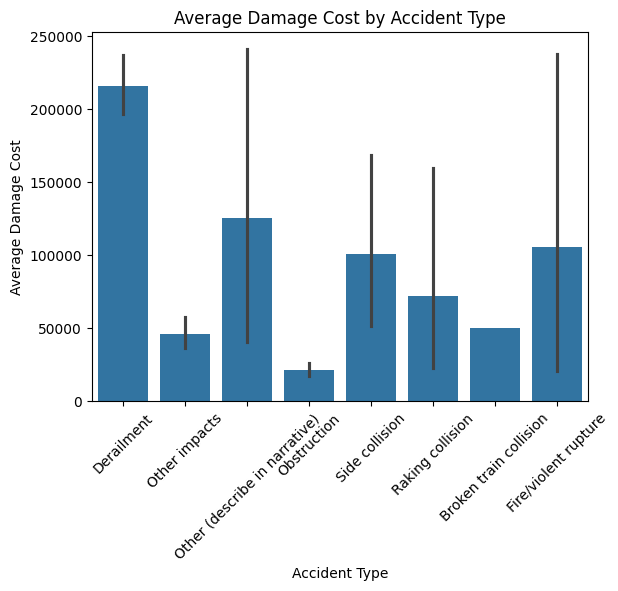

In [ ]:
#visualization - Barplot
sns.barplot(x='accidenttype', y='totaldamagecost', data=railroad_df)
plt.title('Average Damage Cost by Accident Type')
plt.xlabel('Accident Type')
plt.ylabel('Average Damage Cost')
plt.xticks(rotation=45)
plt.show()

<ipython-input-9-342891bb02d3>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(x='accidenttype', y='totaldamagecost', data=railroad_df, ci=None)


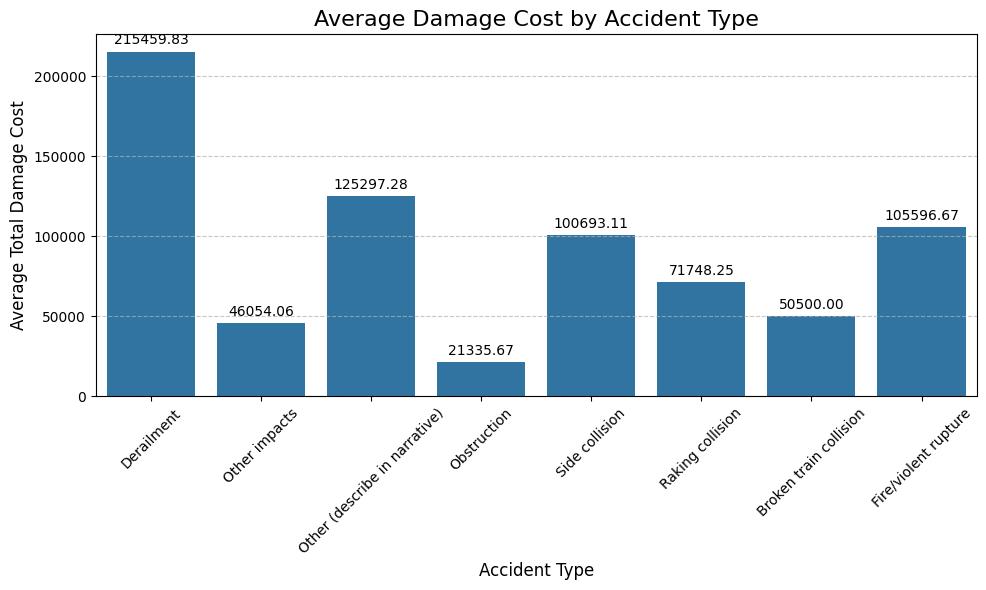

In [ ]:
# Create the barplot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='accidenttype', y='totaldamagecost', data=railroad_df, ci=None)

# Add annotations (value labels) on top of the bars
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'),  # Format the value to 2 decimal places
                     (p.get_x() + p.get_width() / 2., p.get_height()),  # Position of label
                     ha='center', va='center', xytext=(0, 8), textcoords='offset points')  # Offset text

# Customize plot appearance
plt.title('Average Damage Cost by Accident Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=12)
plt.ylabel('Average Total Damage Cost', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add a light grid for clarity
plt.tight_layout()  # Adjust layout to prevent clipping

# Show the plot
plt.show()


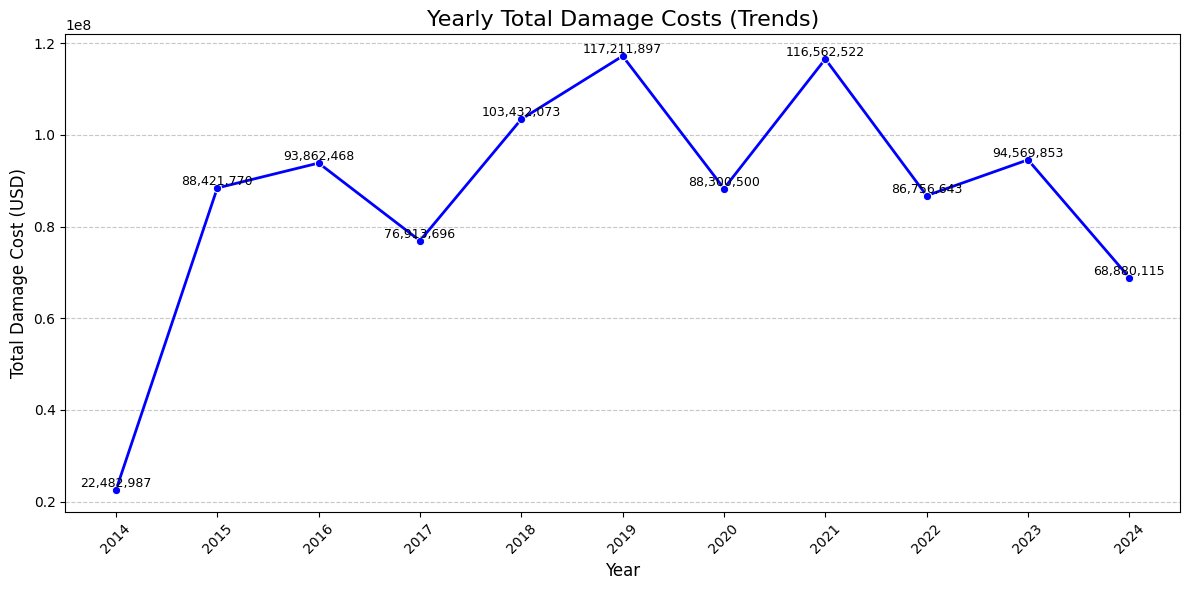

In [ ]:
# Group data by year and calculate total damage costs
railroad_df['year'] = railroad_df['date'].dt.year
yearly_costs = railroad_df.groupby('year')['totaldamagecost'].sum().reset_index()

# Plot the yearly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_costs, x='year', y='totaldamagecost', marker='o', linewidth=2, color='blue')

# Highlight data points with annotations
for x, y in zip(yearly_costs['year'], yearly_costs['totaldamagecost']):
    plt.text(x, y, f'{y:,.0f}', ha='center', va='bottom', fontsize=9)

# Enhance the graph's appearance
plt.title('Yearly Total Damage Costs (Trends)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Damage Cost (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(yearly_costs['year'], rotation=45)
plt.tight_layout()

# Show the graph
plt.show()


In [ ]:
#Filtering data for derailments only
derailments = railroad_df[railroad_df['accidenttype'] == 'Derailment']
print(derailments['totaldamagecost'].describe())


count    4.301000e+03
mean     2.154598e+05
std      6.681265e+05
min      0.000000e+00
25%      2.168600e+04
50%      5.074400e+04
75%      1.559590e+05
max      2.201925e+07
Name: totaldamagecost, dtype: float64


In [ ]:
# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print(railroad_df.head())


  reportingrailroadcode accidentnumber       date      time accidenttype  \
0                   CSX      000178042 2018-08-07  10:51 AM   Derailment   
1                   CSX      000182665 2019-04-30  12:25 AM   Derailment   
2                   CSX      000138406 2014-12-03  11:45 PM   Derailment   
3                   CSX      000188525 2020-02-19   8:44 AM   Derailment   
4                   CSX      000175393 2018-03-24  10:53 AM   Derailment   

   hazmatreleasedcars     station stateabbr  temperature  visibility_code  \
0                   0     BUFFALO        NY           73                2   
1                   0    MILLBURY        OH           42                4   
2                   0       PARMA        OH           35                4   
3                   0  CINCINNATI        OH           25                2   
4                   0        LIMA        OH           36                2   

   ... equipmentdamagecost trackdamagecost totaldamagecost  \
0  ...            

In [ ]:
print(railroad_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4595 entries, 0 to 4594
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   reportingrailroadcode     4595 non-null   object        
 1   accidentnumber            4595 non-null   object        
 2   date                      4595 non-null   datetime64[ns]
 3   time                      4595 non-null   object        
 4   accidenttype              4595 non-null   object        
 5   hazmatreleasedcars        4595 non-null   int64         
 6   station                   4595 non-null   object        
 7   stateabbr                 4595 non-null   object        
 8   temperature               4595 non-null   int64         
 9   visibility_code           4595 non-null   int64         
 10  visibility                4595 non-null   object        
 11  weathercondition          4595 non-null   object        
 12  tracktype           

In [ ]:

print(railroad_df.describe())

                                date  hazmatreleasedcars  temperature  \
count                           4595         4595.000000  4595.000000   
mean   2019-05-25 19:43:20.304678912            0.028945    58.926877   
min              2014-10-19 00:00:00            0.000000   -35.000000   
25%              2016-12-23 00:00:00            0.000000    41.000000   
50%              2019-03-08 00:00:00            0.000000    60.000000   
75%              2021-10-19 00:00:00            0.000000    77.000000   
max              2024-07-30 00:00:00           28.000000   115.000000   
std                              NaN            0.526021    22.587870   

       visibility_code   trainspeed  equipmentdamagecost  trackdamagecost  \
count      4595.000000  4595.000000         4.595000e+03     4.595000e+03   
mean          2.660936     9.551687         1.142599e+05     6.718025e+04   
min           1.000000     0.000000         0.000000e+00     0.000000e+00   
25%           2.000000     4.00000

In [ ]:
# Fill missing numerical values with the median
railroad_df['totaldamagecost'] = railroad_df['totaldamagecost'].fillna(railroad_df['totaldamagecost'].median())
railroad_df['temperature'] = railroad_df['temperature'].fillna(railroad_df['temperature'].median())
railroad_df['trainspeed'] = railroad_df['trainspeed'].fillna(railroad_df['trainspeed'].median())

# Drop rows with missing values in critical columns (if necessary)
railroad_df = railroad_df.dropna(subset=['accidenttype'])

In [ ]:
#convert dates
railroad_df['year'] = railroad_df['date'].dt.year
railroad_df['month'] = railroad_df['date'].dt.month

#Convert categories (e.g., accidenttype) into numeric format using OneHotEncoder.
X = railroad_df[['temperature', 'trainspeed', 'year', 'month', 'accidenttype']]

# Add relevant features
y = railroad_df['totaldamagecost']



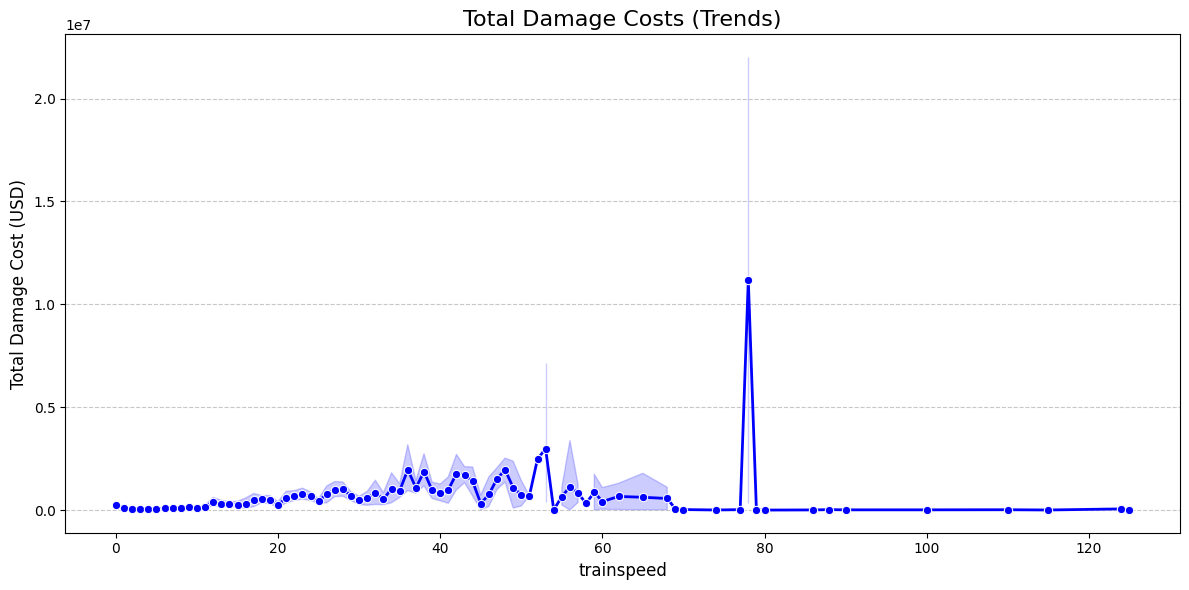

In [ ]:
railroad_df[['trainspeed', 'totaldamagecost']]

# Plot the yearly trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=railroad_df[['trainspeed', 'totaldamagecost']], x='trainspeed', y='totaldamagecost', marker='o', linewidth=2, color='blue')

# Enhance the graph's appearance
plt.title('Total Damage Costs (Trends)', fontsize=16)
plt.xlabel('trainspeed', fontsize=12)
plt.ylabel('Total Damage Cost (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the graph
plt.show()


In [ ]:
#split the data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Preprocessing for numerical and categorical data
numerical_features = ['temperature', 'trainspeed', 'year', 'month']
categorical_features = ['accidenttype']

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

In [ ]:
# Define the model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['temperature', 'trainspeed',
                                                   'year', 'month']),
                                                 ('cat', OneHotEncoder(),
                                                  ['accidenttype'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 743365643326.7644
R² Score: -0.07000927368803223


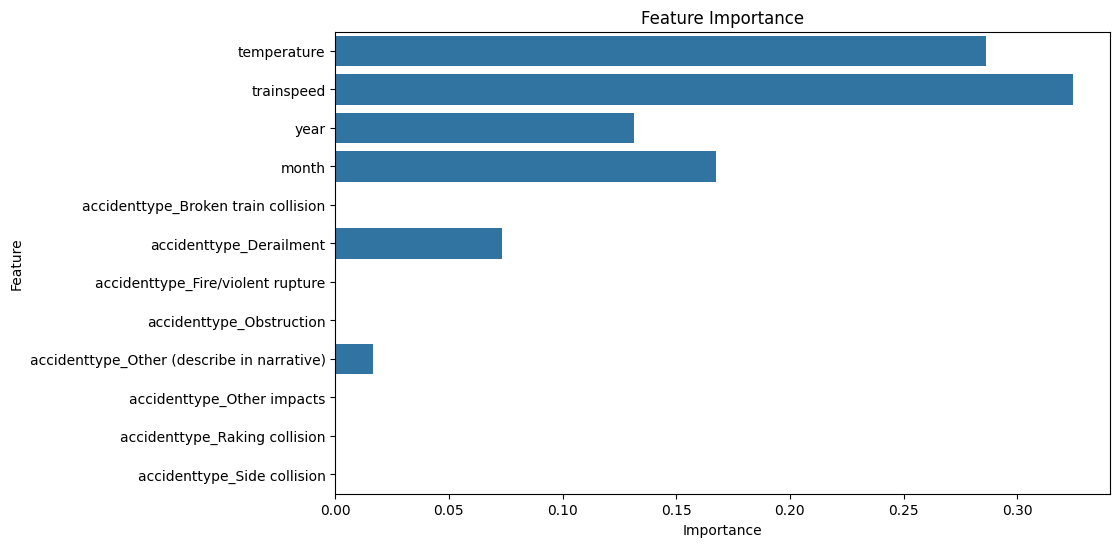

In [ ]:
# Extract feature importances
feature_names = numerical_features + list(model.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())
importances = model.named_steps['regressor'].feature_importances_

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

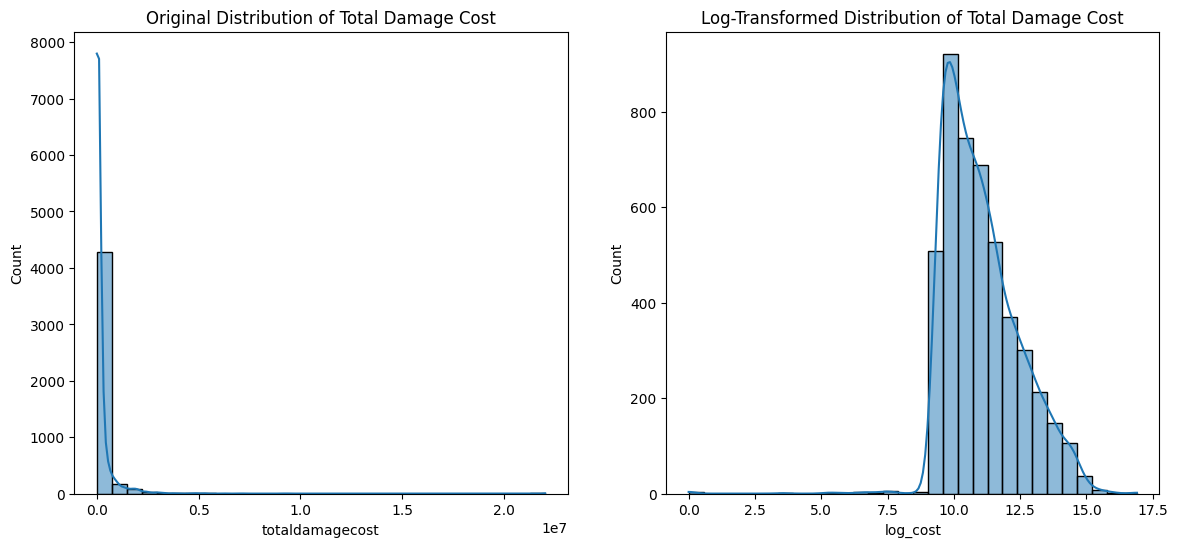

In [ ]:
import numpy as np

# Apply log transformation to totaldamagecost
railroad_df['log_cost'] = np.log1p(railroad_df['totaldamagecost'])  # log(1 + x) to handle zeros safely

# Visualize the distribution before and after
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(railroad_df['totaldamagecost'], bins=30, kde=True)
plt.title("Original Distribution of Total Damage Cost")

plt.subplot(1, 2, 2)
sns.histplot(railroad_df['log_cost'], bins=30, kde=True)
plt.title("Log-Transformed Distribution of Total Damage Cost")
plt.show()


In [ ]:
# Create interaction features = adding interaction features can explain more variance in totaldamagecost.
railroad_df['temp_speed_interaction'] = railroad_df['temperature'] * railroad_df['trainspeed']


In [ ]:
# Update Features and Target * replacing totaldamagecost with log_cost
X = railroad_df[['temperature', 'trainspeed', 'temp_speed_interaction', 'year', 'month', 'accidenttype']]
y = railroad_df['log_cost']  # Log-transformed target

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5, 10]
}

# Wrap in GridSearchCV
grid_search = GridSearchCV(
    estimator=Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', RandomForestRegressor(random_state=42))
    ]),
    param_grid=param_grid,
    scoring='r2',
    cv=5
)

# Train with cross-validation
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:982: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 971, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 279, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 371, in _score
    y_pred = method_caller(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 89, in _cached_call
    result, _ = _get_response_values(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_response.py", line 239, in _get_response_values
    y_pred, pos_label = predic

Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 100}


In [ ]:
# Make predictions
y_pred = grid_search.best_estimator_.predict(X_test)

# Calculate metrics
mse = mean_squared_error(np.expm1(y_test), np.expm1(y_pred))  # Transform back to original scale
r2 = r2_score(np.expm1(y_test), np.expm1(y_pred))

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Squared Error (MSE): 662621185686.5934
R² Score: 0.046215250877350345


In [ ]:
# Baseline performance
baseline_pred = [np.mean(y_train)] * len(y_test)
baseline_mse = mean_squared_error(np.expm1(y_test), np.expm1(baseline_pred))
baseline_r2 = r2_score(np.expm1(y_test), np.expm1(baseline_pred))

print("Baseline MSE:", baseline_mse)
print("Baseline R²:", baseline_r2)


Baseline MSE: 717324574508.5535
Baseline R²: -0.03252545212273428


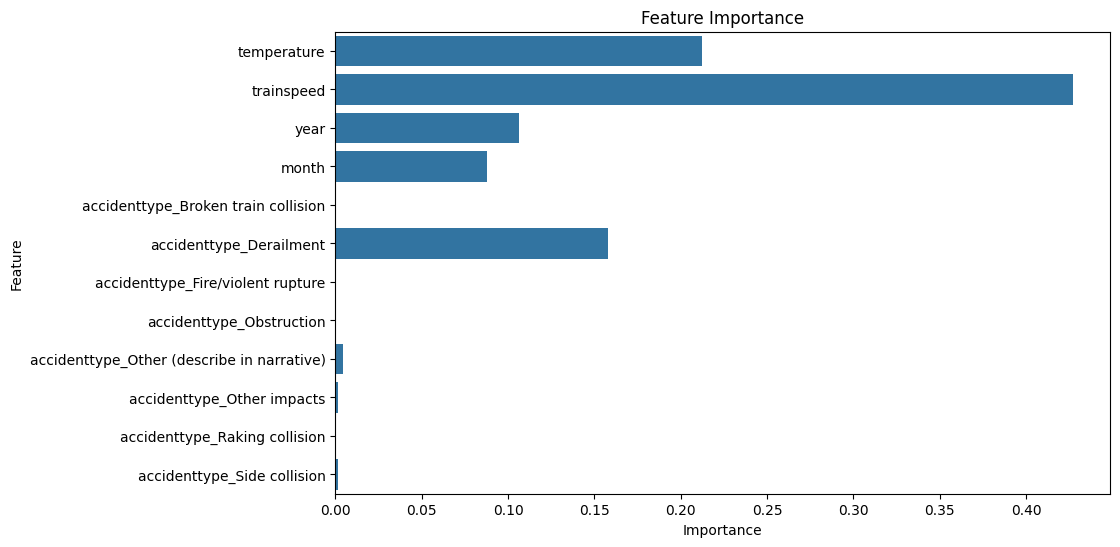

In [ ]:
# Feature importance
feature_importances = grid_search.best_estimator_.named_steps['regressor'].feature_importances_
feature_names = numerical_features + list(grid_search.best_estimator_.named_steps['preprocessor'].transformers_[1][1].get_feature_names_out())

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [ ]:
# Check data types of all features
print(X.dtypes)

# Inspect columns with 'object' or 'category' type
for col in X.select_dtypes(include=['object', 'category']).columns:
    print(f"Unique values in {col}:", X[col].unique())


temperature                int64
trainspeed                 int64
temp_speed_interaction     int64
year                       int32
month                      int32
accidenttype              object
dtype: object
Unique values in accidenttype: ['Derailment' 'Other impacts' 'Other (describe in narrative)'
 'Obstruction' 'Side collision' 'Raking collision'
 'Broken train collision' 'Fire/violent rupture']
